<a href="https://colab.research.google.com/github/beedrumms/Exploring-Public-Responses-to-Government-COVID-19-Policies/blob/main/4)_A)_ON_EDA_of_Tweets_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load 

In [ ]:
# Explortory Analysis libraries
import pandas as pd
import numpy as np
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from pylab import rcParams
from datetime import datetime
import collections
from collections import Counter 
import itertools
import matplotlib.pyplot as plt
%matplotlib inline
from plotly.offline import plot
import plotly.graph_objects as go
import plotly.express as px

import sklearn 
from sklearn.feature_extraction.text import CountVectorizer
import nltk
from nltk.util import ngrams

# Mounting google colab on drive 
from google.colab import drive, files
import os
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
# download my dataset from my drive 
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/PROCESSED_ONTARIO_COVID19_TWEETS.csv')    
tweets_df = data[['Datetime', 'Text', 'Text_Unprocessed']]
tweets_df.columns, tweets_df.shape # ensuring everthing read in properly

(Index(['Datetime', 'Text', 'Text_Unprocessed'], dtype='object'), (557496, 3))

In [ ]:
# Converting dates to datetime objects 
tweets_df['Datetime'] = pd.to_datetime(tweets_df['Datetime']) # converting to datetime
tweets_df['Datetime'] = tweets_df['Datetime'].dt.date # converting to just Year-Month-Day format 
tweets_df.Datetime.head(2), tweets_df.Datetime.tail(2)

# Visualize

In [ ]:
from PIL import Image
mask = np.array(Image.open('/content/drive/MyDrive/Colab Notebooks/ontario.jpg'))

tweet_cloud = WordCloud(width=800, height=800, max_font_size=200, background_color="whitesmoke", colormap="tab20b").generate(tweet_str) # creating the word cloud 
tweet_cloud.generate(article.text)
plt.figure(figsize=(12,12))
plt.imshow(tweet_cloud, interpolation="bilinear")
plt.axis("off")
plt.show()

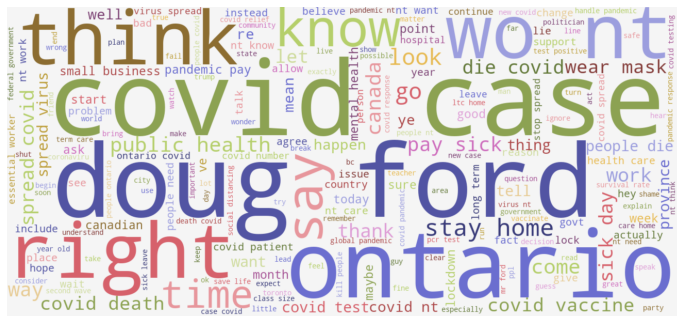

In [ ]:
# Looking again at the clean data word cloud we have some ideas of the themes people are talking about 
tweet_str = [] # Making string of tweet data
for t in tweets_df['Text']:
  tweet_str.append(t)
tweet_str = pd.Series(tweet_str).str.cat(sep=' ')

tweet_cloud = WordCloud(width=1300, height=600, max_font_size=200, background_color="whitesmoke", colormap="tab20b").generate(tweet_str) # creating the word cloud 
plt.figure(figsize=(12,12))
plt.imshow(tweet_cloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
# Looking at how many unique dates I have 
print(tweets_df['Datetime'].nunique()) # 457 unique days (about 15 months if you divide by the average days in a month over the year (30.6))
import statistics
print(statistics.mean(tweets_df['Datetime'].value_counts())) # 1219.1 tweets a day is the average
print(statistics.median(tweets_df['Datetime'].value_counts())) # 1018 tweets a day is the median 
print(max(tweets_df['Datetime'].value_counts())) # 6322
print(min(tweets_df['Datetime'].value_counts())) # 36

457
1219.9037199124728
1018
6322
36


In [ ]:
dates = tweets_df['Datetime'].value_counts() > 500 
dates_with_500_occurances = dates[dates == True]
dates_with_500_occurances # 413 dates have the min day requirment of 500 occurances

2021-04-16    True
2021-04-17    True
2021-04-01    True
2021-04-07    True
2021-01-12    True
              ... 
2020-03-13    True
2020-07-10    True
2020-07-19    True
2020-05-10    True
2020-07-11    True
Name: Datetime, Length: 413, dtype: bool

In [ ]:
# It aapears that there is a parsing issue resulting in a number of nan lines -- I will drop them for now 
is_na = tweets_df['Text'].isna()
is_nalist = tweets_df[is_na]
is_na_list

,Datetime,Text,Text_Unprocessed
1189,2021-05-30,NaN,"down, to go..."
4966,2021-05-23,NaN,this 👇🏾
6912,2021-05-20,NaN,👇🏻😡 when
17164,2021-05-07,NaN,please please please
20694,2021-05-03,NaN,so.. how about that
...,...,...,...
556425,2020-03-13,NaN,and your move
556496,2020-03-13,NaN,
556821,2020-03-12,NaN,please
556900,2020-03-12,NaN,


In [ ]:
is_not_na = tweets_df['Text'].notna()
tweets_df = tweets_df[is_not_na]
tweets_df

,Datetime,Text,Text_Unprocessed
0,2021-05-31,be nt pandemic hell attend hundred thousand si...,arent we in a pandemic who the hell is atte...
1,2021-05-31,poor doctor tonight likely pass million billin...,here is one of those poor doctors here ton...
2,2021-05-31,resident sick covid family court bankrupt jail...,how about if you make a resident sick with co...
3,2021-05-31,allow pandemic screw,we will never be allowed to be done with thi...
4,2021-05-31,honestly love response question fan attendance...,would honestly love a response to this ques...
...,...,...,...
557491,2020-03-01,stay tuned dofos new video blame liberal covid...,stay tuned for dofos new video blaming the l...
557492,2020-03-01,measure prevent spread iranian community toron...,is there any measures to prevent spreading in...
557493,2020-03-01,epidemic expert jonathan quick worstcase scena...,epidemics expert jonathan quick : ‘the worstca...
557494,2020-03-01,think want rethink policy have sick people phy...,i am thinking you may want to rethink your po...


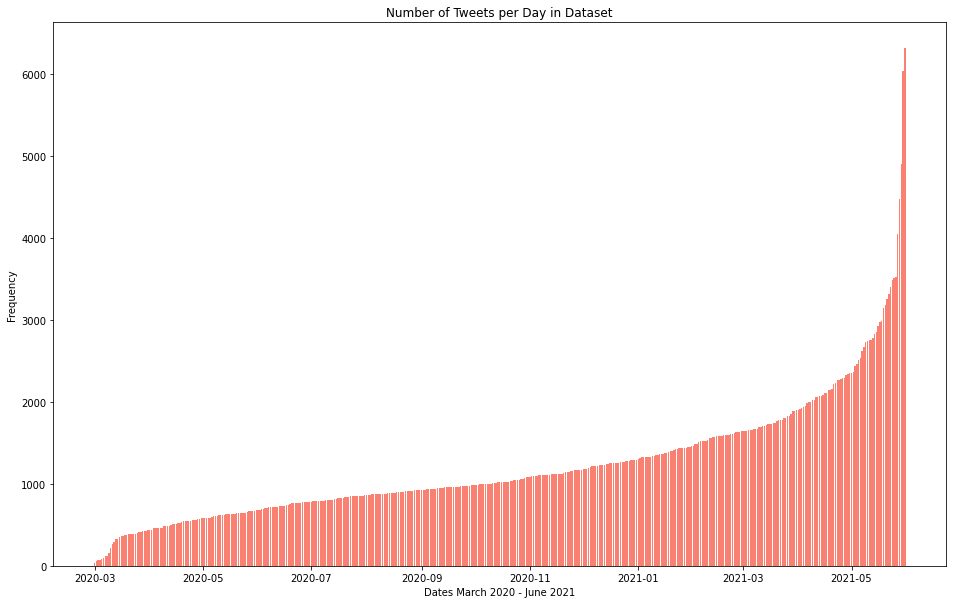

In [ ]:
# Visualizing the frequency of tweets per day
x_val = tweets_df['Datetime'].unique()
h_val = tweets_df['Datetime'].value_counts()
plt.bar(x = x_val, height = h_val, color = 'salmon')
plt.xlabel("Dates March 2020 - June 2021")
plt.ylabel("Frequency")
plt.title("Number of Tweets per Day in Dataset")
plt.rc('figure', figsize=(16,10))
plt.show()

In [ ]:
tweets_list = tweets_df['Text'].tolist()

# Tokenize
wordsy = [] 
for t in tweets_list:
  wordsy.append(str(t).split())

# Count word frequencies
tweet_stream = [item for sublist in wordsy for item in sublist]
word_counts = collections.Counter(tweet_stream)
word_counts.most_common(100)

[('covid', 283834),
 ('pandemic', 135948),
 ('nt', 124315),
 ('people', 103052),
 ('virus', 95690),
 ('do', 75394),
 ('ontario', 64859),
 ('need', 59988),
 ('s', 55795),
 ('case', 46749),
 ('school', 43085),
 ('work', 42561),
 ('ford', 42297),
 ('like', 41290),
 ('day', 39265),
 ('know', 38831),
 ('go', 38054),
 ('health', 37439),
 ('vaccine', 37211),
 ('spread', 35959),
 ('time', 35769),
 (')', 35753),
 ('home', 34805),
 ('test', 34571),
 ('death', 34213),
 ('stop', 33366),
 ('(', 33175),
 ('government', 33139),
 ('get', 32178),
 ('lockdown', 30399),
 ('care', 30280),
 ('pay', 30276),
 ('die', 29472),
 ('think', 28443),
 ('help', 26320),
 ('mask', 26319),
 ('open', 26201),
 ('be', 26163),
 ('I', 26100),
 ('say', 25723),
 ('year', 25250),
 ('doug', 24714),
 ('want', 24533),
 ('new', 24245),
 ('come', 23460),
 ('plan', 23334),
 ('you', 23322),
 ('right', 23167),
 ('business', 22756),
 ('kid', 22656),
 ('number', 22523),
 ('m', 22481),
 ('$', 22474),
 ('re', 22082),
 ('let', 22059),
 ('s

In [ ]:
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(tweets_list, 50)
df2 = pd.DataFrame(common_words, columns = ['unigram' , 'count'])

fig = go.Figure([go.Bar(x=df2['unigram'], y=df2['count'])])
fig.update_layout(title=go.layout.Title(text="Top 50 Unigrams"))
fig.show()

In [ ]:
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_bigram(tweets_list, 50)
df3 = pd.DataFrame(common_words, columns = ['bigram' , 'count'])

fig = go.Figure([go.Bar(x=df3['bigram'], y=df3['count'])])
fig.update_layout(title=go.layout.Title(text="Top 50 Bigrams"))
fig.show()

In [ ]:
def get_top_n_trigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_trigram(tweets_list, 50)
df4 = pd.DataFrame(common_words, columns = ['trigram' , 'count'])

fig = go.Figure([go.Bar(x=df4['trigram'], y=df4['count'])])
fig.update_layout(title=go.layout.Title(text="Top 50 Trigrams"))
fig.show()

In [ ]:
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(tweets_list, 25)
df2 = pd.DataFrame(common_words, columns = ['unigram' , 'count'])

fig = go.Figure([go.Bar(x=df2['unigram'], y=df2['count'])])
fig.update_layout(title=go.layout.Title(text="Top 25 Unigrams"))
fig.show()

In [ ]:
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_bigram(tweets_list, 25)
df3 = pd.DataFrame(common_words, columns = ['bigram' , 'count'])

fig = go.Figure([go.Bar(x=df3['bigram'], y=df3['count'])])
fig.update_layout(title=go.layout.Title(text="Top 25 Bigrams"))
fig.show()

In [ ]:
def get_top_n_trigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_trigram(tweets_list, 25)
df4 = pd.DataFrame(common_words, columns = ['trigram' , 'count'])

fig = go.Figure([go.Bar(x=df4['trigram'], y=df4['count'])])
fig.update_layout(title=go.layout.Title(text="Top 25 Trigrams"))
fig.show()